**Name:** Alex Medina

**Organization:** University of Central Florida

**Project Title:** Lightcurve Analysis of Titan

**Subsection:** Model Visualization

**Details:** Finally, having completed most of the results, it is time to visualize the results from DAP. Needs a lot of tweaking however, I haven't read these type of output before so it takes some tweaking. But then, I will compare to the observational results which I have saved previously in .csv format.

In [37]:
#Important imports
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Paths and General Parameters

In [30]:
#I run DAP in linux file system but copy files to a folder on my desktop
model_data = r'C:\Users\Alex\Desktop\DAP_output\PL_Titan_5'

#wavelengths (in microns)
wavTitan = [0.4410, 0.5690, 0.6180, 0.6190, 0.7270, 0.7500]

#The files in the DAP output are organized by phase in file name
#and for each phase file, there is rows correseponding to wavelength
#and columns corresponding to what I believe to be I, Q, U
stokes_data = {wl: {'phase': [], 'I': [], 'Q': [], 'U': []} for wl in wavTitan}

Reading DAP Output Files

In [31]:
#Files are sorted in phase angles as 000.00000.dat or 178.00000.dat
#Where the first number is the phase angle

for filename in sorted(os.listdir(model_data)):
    if filename.endswith(".00000.dat"):
        #Phase angle from the filename
        phase_angle = float(filename.split('.')[0])
        
        with open(os.path.join(model_data, filename), 'r') as file:
            #Reading each line in the file because it's a string like
            #"0.4410  0.492397E+00  0.000000E+00  -.00000000"
            for line in file:
                #Removing blank space and splitting into substrings
                #['0.4410', '0.492397E+00', '0.000000E+00, '-.00000000']
                parts = line.strip().split()

                #Converting string to number (float) accorindgly
                wl = float(parts[0])
                I = float(parts[1])
                Q = float(parts[2])
                U = float(parts[3])

                stokes_data[wl]['phase'].append(phase_angle)
                stokes_data[wl]['I'].append(I)
                stokes_data[wl]['Q'].append(Q)
                stokes_data[wl]['U'].append(U)

Single Wavlength (model)

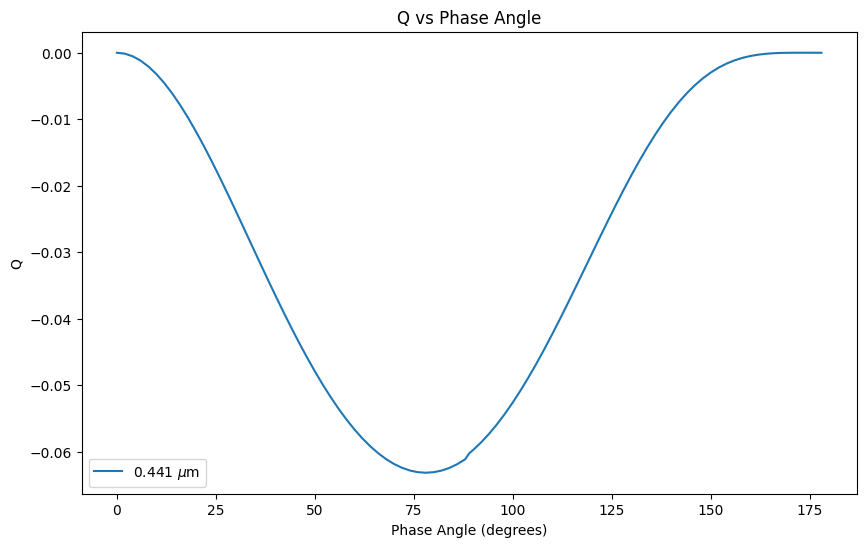

In [32]:
#Plotting individually each wavelength and component
stokes_parameter = 'Q'

#Which wavelength
wl_sing = 0.441

phase_angles = stokes_data[wl_sing]['phase']
stokes_values = stokes_data[wl_sing][stokes_parameter]

plt.figure(figsize=(10, 6))
plt.plot(phase_angles, stokes_values, label=f'{wl_sing:.3f} $\mu$m')
plt.xlabel('Phase Angle (degrees)')
plt.ylabel(stokes_parameter)
plt.title(f'{stokes_parameter} vs Phase Angle')
plt.legend()
plt.show()

Complete Results (model)

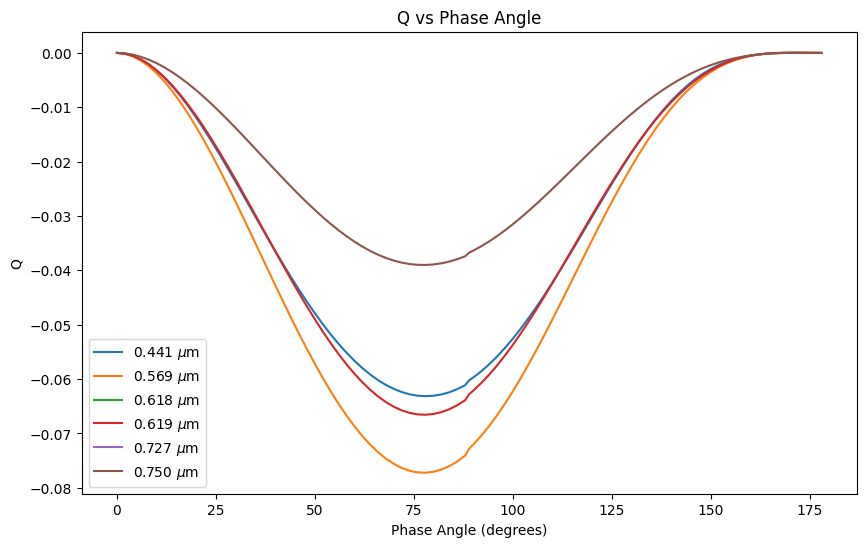

In [33]:
#To instead plot ALL of them
stokes_parameter = 'Q'

plt.figure(figsize=(10, 6))
for wl in wavTitan:
    phase_angles = stokes_data[wl]['phase']
    stokes_values = stokes_data[wl][stokes_parameter]
    plt.plot(phase_angles, stokes_values, label=f'{wl:.3f} $\mu$m')

plt.xlabel('Phase Angle (degrees)')
plt.ylabel(stokes_parameter)
plt.title(f'{stokes_parameter} vs Phase Angle')
plt.legend()
plt.show()

Observational Comparison

In [34]:
#For observational results
#I saved them in .csv format

obs_folder = r'C:\Users\Alex\Desktop\DAP_output\OBS_results'

obs_files = ['obs_0441.csv', 'obs_0569.csv', 'obs_0618.csv', 'obs_0619.csv', 'obs_0727.csv', 'obs_0750.csv']

#Compared to model data
obs_data = {}

#Reading each file
for wl, fname in zip(wavTitan, obs_files):
    filepath = os.path.join(obs_folder, fname)
    df = pd.read_csv(filepath, sep=',')
    obs_data[wl] = df

Single Wavelength (compare)

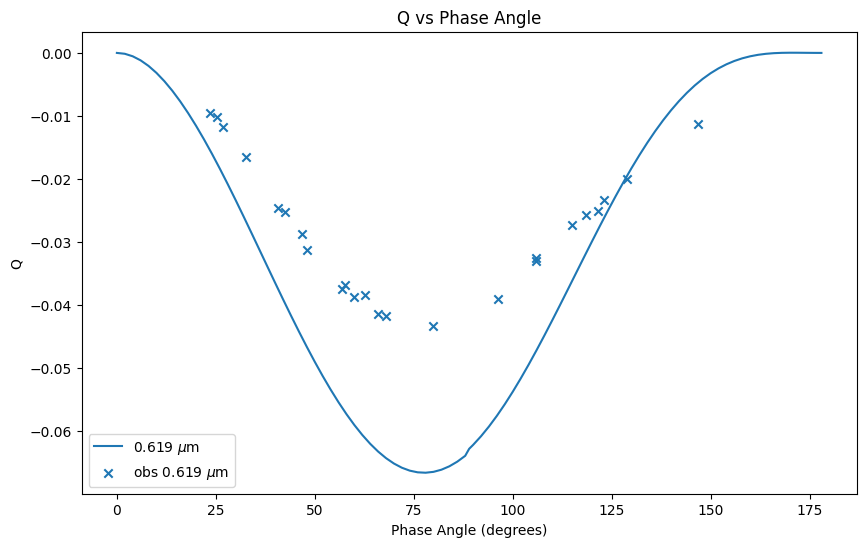

In [35]:
#Plotting individually each wavelength and component
stokes_parameter = 'Q'

#For the observational we only have scat_q which is equal to Q 
#Or scat_u = U
obs_col = 'scat_q' if stokes_parameter == 'Q' else 'scat_u'

#Which wavelength
wl_sing = 0.619

phase_angles = stokes_data[wl_sing]['phase']
stokes_values = stokes_data[wl_sing][stokes_parameter]

df_obs = obs_data[wl_sing]
phase_obs = df_obs['phase_angles']
values_obs = df_obs[obs_col]

plt.figure(figsize=(10, 6))

plt.plot(phase_angles, stokes_values, label=f'{wl_sing:.3f} $\mu$m')
plt.scatter(phase_obs, values_obs, label=f'obs {wl_sing:.3f} $\mu$m', marker='x')

plt.xlabel('Phase Angle (degrees)')
plt.ylabel(stokes_parameter)
plt.title(f'{stokes_parameter} vs Phase Angle')
plt.legend()
plt.show()

Complete Results (compare)

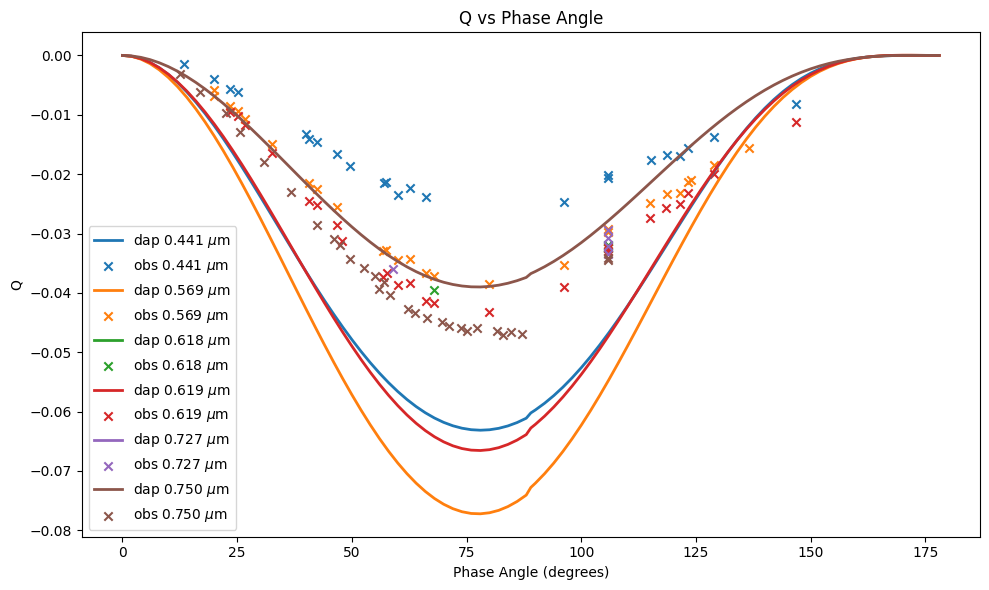

In [36]:
#Plotting all of them
stokes_parameter = 'Q'
obs_col = 'scat_q' if stokes_parameter == 'Q' else 'scat_u'

plt.figure(figsize=(10, 6))
for wl in wavTitan:
    phase_model = stokes_data[wl]['phase']
    values_model = stokes_data[wl][stokes_parameter]
    plt.plot(phase_model, values_model, label=f'dap {wl:.3f} $\mu$m', linewidth=2)

    df_obs = obs_data[wl]
    phase_obs = df_obs['phase_angles']
    values_obs = df_obs[obs_col]
    plt.scatter(phase_obs, values_obs, label=f'obs {wl:.3f} $\mu$m', marker='x')

plt.xlabel('Phase Angle (degrees)')
plt.ylabel(stokes_parameter)
plt.title(f'{stokes_parameter} vs Phase Angle')
plt.legend()
plt.tight_layout()
plt.show()